<a href="https://colab.research.google.com/github/jalvarezz13/machine_learning_esi_2122/blob/master/Task2%20-%20Natural%20Languaje%20Processing/notebooks/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Task 2] - Natural Language Processing

Machine Learning Techniques - Escuela Superior de informática.

## Development team
<hr/>

* <img src="https://media.discordapp.net/attachments/487685117414735872/897503707921543228/JZ.png" width="60" height="60" align="center"/> Josue Carlos Zenteno Yave :: JosueCarlos.Zenteno@alu.uclm.es

* <img src="https://media.discordapp.net/attachments/487685117414735872/897503704100536350/SS.png" width="60" height="60" align="center"/> Sergio Silvestre Pavón :: Sergio.Silvestre@alu.uclm.es

* <img src="https://media.discordapp.net/attachments/487685117414735872/897503706185085008/JA.png" width="60" height="60" align="center"/> Javier Álvarez Páramo :: Javier.Alvarez13@alu.uclm.es

* <img src="https://media.discordapp.net/attachments/487685117414735872/897503709871878234/SM.png" width="60" height="60" align="center"/> Sergio Martín-Delgado Gutiérrez :: Sergio.Martinlgado@alu.uclm.es

#0.Environment preparation 


In [ ]:
!wget https://raw.githubusercontent.com/jalvarezz13/machine_learning_esi_2122/master/Task2%20-%20Natural%20Languaje%20Processing/data/comments.csv

--2022-01-21 16:23:18--  https://raw.githubusercontent.com/jalvarezz13/machine_learning_esi_2122/master/Task2%20-%20Natural%20Languaje%20Processing/data/comments.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1690905 (1.6M) [text/plain]
Saving to: ‘comments.csv’

comments.csv        100%[===================>]   1.61M  --.-KB/s    in 0.06s   

2022-01-21 16:23:19 (28.4 MB/s) - ‘comments.csv’ saved [1690905/1690905]



In [ ]:
!pip install contractions
!pip install textblob
import nltk
nltk.download("all")

     |████████████████████████████████| 321 kB 5.1 MB/s 
     |████████████████████████████████| 284 kB 51.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85448 sha256=577eefcde1a68a5375e26636303406fe3bef721612331edb2ee3b1fb0e6efd95
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[

True

#1.Preprocessing

At this section all the considerations that have been taken to normalize and clean the data of the data-set are going to be explained. This explanations are also a part of the own colab file so, if you want to read them there, you can do it easily.

In [ ]:
import pandas as pd
df = pd.read_csv("comments.csv")
df_cleaned = pd.read_csv("comments.csv")
df_cleaned.head()

,class,text
0,Auto,I have recently purchased a J30T with moderat...
1,Camera,I bought this product because I need instant ...
2,Auto,I have owned my Buick since 53000 km and I am...
3,Camera,This was my first Digital camera so I did qui...
4,Camera,Minolta DiMAGE 7Hi is in a digital SLR with 5...


## 1.1. Removing useless data

First things first, as into the data-set there are real reviews written by people, it is easy to find some grammatical errors, missing words, emojis, special characters... 

Therefore, in order to turn this data into something useful and make it a valuable thing we have to clean the data. So, at this point we are going to remove all the punctuation marks from the different reviews.

We have considered all the English punctuation marks. So, in order to remove them, an algorithm has been developed and you can find it in the below section.

In [ ]:
import string
from nltk.tokenize import word_tokenize

i = 0
for sentence in df_cleaned["text"]:
  tokenized = word_tokenize(sentence)
  
  j = 0
  for word in tokenized:
    if word in string.punctuation:
      tokenized.pop(j)
    j+=1

  df_cleaned["text"][i] = tokenized
  i+=1
  

In [ ]:
df_cleaned

,class,text
0,Auto,"[I, have, recently, purchased, a, J30T, with, ..."
1,Camera,"[I, bought, this, product, because, I, need, i..."
2,Auto,"[I, have, owned, my, Buick, since, 53000, km, ..."
3,Camera,"[This, was, my, first, Digital, camera, so, I,..."
4,Camera,"[Minolta, DiMAGE, 7Hi, is, in, a, digital, SLR..."
...,...,...
595,Auto,"[Recently, our, 12, year, old, Nissan, Stanza,..."
596,Camera,"[I, always, do, a, lot, of, research, before, ..."
597,Auto,"[This, car, is, an, all, around, good, buy, If..."
598,Auto,"[I, waited, to, write, this, until, I, have, h..."


## 1.2. Removing all capital letters

Once we have deleted all the punctuation marks we can proceed by removing all the capital letters that exists in the data of the data-set. As we are using Python3 we can easily turn all the text from capital letter to lower case by using a simple function.

So, in order to remove them from all the reviews, an algorithm has been developed and you can find it in the below section.

In [ ]:
i = 0
for sentence in df_cleaned['text']:
   j = 0
   for word in sentence:
     sentence[j] = word.lower()
     j+=1
   df_cleaned['text'][i] = sentence
   i+=1

In [ ]:
df_cleaned.head()

,class,text
0,Auto,"[i, have, recently, purchased, a, j30t, with, ..."
1,Camera,"[i, bought, this, product, because, i, need, i..."
2,Auto,"[i, have, owned, my, buick, since, 53000, km, ..."
3,Camera,"[this, was, my, first, digital, camera, so, i,..."
4,Camera,"[minolta, dimage, 7hi, is, in, a, digital, slr..."


## 1.3. Lemmatizing all terms

As we have successfully removed all the punctuation marks and capital letter we can now lemmatize all the words that are part of the different sentences that we have into the data-set. To do that, first we have to explain what do we mean by saying "lemmatize". Lemmatizing is not something strange, in fact it is as easy as you can see in the following example: 

*  *Ex: Working -- Work, Tried -- Try.*

In conclusion, lemmatisation is the algorithmic process of determining the lemma of a word based on its intended meaning. So, we have to do this because we do not have any profit by using the conjugated words so by removing them we simplify the data.

In order to remove them from all the reviews, an algorithm has been developed and you can find it in the below section.

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

i=0
for sentence in df_cleaned['text']:
  df_cleaned['text'][i] = [lemmatizer.lemmatize(word, pos = 'v') for word in sentence]
  i+=1

df_cleaned.head()

,class,text
0,Auto,"[i, have, recently, purchase, a, j30t, with, m..."
1,Camera,"[i, buy, this, product, because, i, need, inst..."
2,Auto,"[i, have, own, my, buick, since, 53000, km, an..."
3,Camera,"[this, be, my, first, digital, camera, so, i, ..."
4,Camera,"[minolta, dimage, 7hi, be, in, a, digital, slr..."


## 1.4. Removing contractions

Another important thing, is trying to remove all the contractions that appears in the text. This is because of the same reason than the previous step, because we do not have any kind of profit by having contractions in our data.

So, in order to remove them from all the reviews, an algorithm has been developed and you can find it in the below section.

In [ ]:
import contractions

i=0
for sentence in df_cleaned['text']:
  df_cleaned['text'][i] = word_tokenize(contractions.fix(" ".join(sentence)))
  i+=1

df_cleaned.head()

,class,text
0,Auto,"[i, have, recently, purchase, a, j30t, with, m..."
1,Camera,"[i, buy, this, product, because, i, need, inst..."
2,Auto,"[i, have, own, my, buick, since, 53000, km, an..."
3,Camera,"[this, be, my, first, digital, camera, so, i, ..."
4,Camera,"[minolta, dimage, 7hi, be, in, a, digital, slr..."


## 1.5. Removing repeated words

Now, another important step is to remove the repeated words in the text, usually English speakers 
emphasize what they say by repeating words but now we do not need that in our text. 

So, in order to remove them from all the reviews, an algorithm has been developed and you can find it in the below section.

In [ ]:
i = 0
repetido = 8

while repetido != 0:
  repetido = 0
  for sentence in df_cleaned["text"]:
    j = 0
    for word in sentence:
      if j!= 0:
        if word == sentence[j-1]:
          sentence.pop(j)
          repetido += 1
      j+=1

    df_cleaned["text"][i] = sentence
    i+=1

## 1.6. Removing or replacing emoticons

We think that, at this point, the purpose of removing emoticons or "emojis" is obvious. It is something irrelevant in our task and we have to remove them in the same way we have removed the previous kind of irrelevant information.  

So, in order to remove them from all the reviews, an algorithm has been developed and you can find it in the below section.

In [ ]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize

i=0
for sentence in df_cleaned['text']:
  emojisCadena = re.findall(u'[\U0001F300-\U0001F5FF | \U0001F600-\U0001F64F | \U0001F680-\U0001F6FA | \u260E-\u26FF-\u2700-\u27BF]', ''.join(df_cleaned['text'][i]))
  # Reemplaza los que encuentre
  for j in range(0, len(emojisCadena)):
    if emojisCadena[j] != '':
      df_cleaned['text'][i].pop(j)
  i+=1

df_cleaned

,class,text
0,Auto,"[i, have, recently, purchase, a, j30t, with, m..."
1,Camera,"[i, buy, this, product, because, i, need, inst..."
2,Auto,"[i, have, own, my, buick, since, 53000, km, an..."
3,Camera,"[this, be, my, first, digital, camera, so, i, ..."
4,Camera,"[minolta, dimage, 7hi, be, in, a, digital, slr..."
...,...,...
595,Auto,"[recently, our, 12, year, old, nissan, stanza,..."
596,Camera,"[i, always, do, a, lot, of, research, before, ..."
597,Auto,"[this, car, be, an, all, around, good, buy, if..."
598,Auto,"[i, wait, to, write, this, until, i, have, 4, ..."


## 1.7. Correcting wrong words

As we said before, people doesn't care about having a perfect grammar when they write a review. People usually writes them in a fast way with lots of misspellings. Now in contrast to the rest of the sections having our text properly written is very important thinking about the following steps (model ones)

So, in order to correct the grammatical errors in the reviews, an algorithm has been developed and you can find it in the below section.

In [ ]:
from textblob import TextBlob

i=0
for sentence in df_cleaned['text']:
  df_cleaned['text'][i] = word_tokenize("{0}".format(TextBlob(" ".join(sentence)).correct()))
  i+=1

df_cleaned.head()

,class,text
0,Auto,"[i, have, recently, purchase, a, just, with, m..."
1,Camera,"[i, buy, this, product, because, i, need, inst..."
2,Auto,"[i, have, own, my, quick, since, 53000, km, an..."
3,Camera,"[this, be, my, first, digital, camera, so, i, ..."
4,Camera,"[minorca, damage, hi, be, in, a, digital, sir,..."


 # 2.Vectorization

Prepare the dataframe, converting to text strings

In [ ]:
for i in range(0, len(df_cleaned['text'])):
  df_cleaned['text'][i] = ' '.join(df_cleaned['text'][i])

df_cleaned

,class,text
0,Auto,i have recently purchase a just with moderate ...
1,Camera,i buy this product because i need instant grat...
2,Auto,i have own my quick since 53000 km and i be no...
3,Camera,this be my first digital camera so i do quite ...
4,Camera,minorca damage hi be in a digital sir with 5 m...
...,...,...
595,Auto,recently our 12 year old nissan stanza decide ...
596,Camera,i always do a lot of research before i buy any...
597,Auto,this car be an all around good buy if you be i...
598,Auto,i wait to write this until i have 4 months of ...


## 2.1. TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(use_idf=True, smooth_idf=True)

#fit and transform
data_tfidf = vectorizer_tfidf.fit_transform(df_cleaned['text'])

#create the dataframe to display the output
import pandas 
cv_dataframe_tfidf = pandas.DataFrame(data_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names())
print(cv_dataframe_tfidf)


           00  000   01   02  024  ...  ziebart  zip  zone  zoombrowser  zum
0    0.000000  0.0  0.0  0.0  0.0  ...      0.0  0.0   0.0          0.0  0.0
1    0.000000  0.0  0.0  0.0  0.0  ...      0.0  0.0   0.0          0.0  0.0
2    0.000000  0.0  0.0  0.0  0.0  ...      0.0  0.0   0.0          0.0  0.0
3    0.000000  0.0  0.0  0.0  0.0  ...      0.0  0.0   0.0          0.0  0.0
4    0.000000  0.0  0.0  0.0  0.0  ...      0.0  0.0   0.0          0.0  0.0
..        ...  ...  ...  ...  ...  ...      ...  ...   ...          ...  ...
595  0.000000  0.0  0.0  0.0  0.0  ...      0.0  0.0   0.0          0.0  0.0
596  0.067334  0.0  0.0  0.0  0.0  ...      0.0  0.0   0.0          0.0  0.0
597  0.000000  0.0  0.0  0.0  0.0  ...      0.0  0.0   0.0          0.0  0.0
598  0.000000  0.0  0.0  0.0  0.0  ...      0.0  0.0   0.0          0.0  0.0
599  0.000000  0.0  0.0  0.0  0.0  ...      0.0  0.0   0.0          0.0  0.0

[600 rows x 8560 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 2.2. TFIDF + N-grams

In [ ]:
#n-gramas:  ngram_range=(min,max)
vectorizer_tfidf_ngrams = TfidfVectorizer(ngram_range=(1,3))
data_tfidf_ngrams = vectorizer_tfidf_ngrams.fit_transform(df_cleaned['text'])

cv_dataframe_tfidf_ngrams=pandas.DataFrame(data_tfidf_ngrams.toarray(),columns=vectorizer_tfidf_ngrams.get_feature_names())
print(cv_dataframe_tfidf_ngrams)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


           00  00 00  00 00 from  ...  zum be later  zum this  zum this car
0    0.000000    0.0         0.0  ...           0.0       0.0           0.0
1    0.000000    0.0         0.0  ...           0.0       0.0           0.0
2    0.000000    0.0         0.0  ...           0.0       0.0           0.0
3    0.000000    0.0         0.0  ...           0.0       0.0           0.0
4    0.000000    0.0         0.0  ...           0.0       0.0           0.0
..        ...    ...         ...  ...           ...       ...           ...
595  0.000000    0.0         0.0  ...           0.0       0.0           0.0
596  0.025137    0.0         0.0  ...           0.0       0.0           0.0
597  0.000000    0.0         0.0  ...           0.0       0.0           0.0
598  0.000000    0.0         0.0  ...           0.0       0.0           0.0
599  0.000000    0.0         0.0  ...           0.0       0.0           0.0

[600 rows x 347161 columns]


## 2.3. TFIDF + N-grams + POS tagging

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#N-grams
vectorizer_tfidf_ngrams_postag = TfidfVectorizer(ngram_range=(1,3))
data_tfidf_ngrams_postag = vectorizer_tfidf_ngrams_postag.fit_transform(df_cleaned['text'])

#Pos tagging
columns = nltk.pos_tag(vectorizer_tfidf_ngrams_postag.get_feature_names())

cv_dataframe_tfidf_ngrams_postag=pd.DataFrame(data_tfidf_ngrams_postag.toarray(),columns=columns)
print(cv_dataframe_tfidf_ngrams_postag)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


     (00, CD)  (00 00, CD)  ...  (zum this, NN)  (zum this car, NN)
0    0.000000          0.0  ...             0.0                 0.0
1    0.000000          0.0  ...             0.0                 0.0
2    0.000000          0.0  ...             0.0                 0.0
3    0.000000          0.0  ...             0.0                 0.0
4    0.000000          0.0  ...             0.0                 0.0
..        ...          ...  ...             ...                 ...
595  0.000000          0.0  ...             0.0                 0.0
596  0.025137          0.0  ...             0.0                 0.0
597  0.000000          0.0  ...             0.0                 0.0
598  0.000000          0.0  ...             0.0                 0.0
599  0.000000          0.0  ...             0.0                 0.0

[600 rows x 347161 columns]


#3.Feature selection

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_regression

# Create feature and target variable for Classification problem
X_clf=cv_dataframe_tfidf_ngrams_postag

y_clf=df_cleaned['class']

y_clf = np.where(y_clf == 'Auto', 0, y_clf)
y_clf = np.where(y_clf == 'Camera', 1, y_clf)
y_clf = y_clf.astype('int')

num_features = int(len(X_clf.columns)*0.3)

# k is the number of features you want to select [here it's 30%]
X_clf_new=SelectKBest(score_func=chi2,k=num_features).fit_transform(X_clf,y_clf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
pd_features = pd.DataFrame(X_clf_new)
print(pd_features)

       0         1       2       3       ...  104144  104145  104146  104147
0    0.000000  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0
1    0.000000  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0
2    0.000000  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0
3    0.000000  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0
4    0.000000  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0
..        ...       ...     ...     ...  ...     ...     ...     ...     ...
595  0.000000  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0
596  0.025137  0.038692     0.0     0.0  ...     0.0     0.0     0.0     0.0
597  0.000000  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0
598  0.000000  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0
599  0.000000  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0

[600 rows x 104148 columns]


# 4.Classification algorithm

In [ ]:
from sklearn import model_selection, svm
from sklearn.feature_extraction.text import TfidfVectorizer

# 30\% test-70\% train
X_train, X_test, y_train, y_test = model_selection.train_test_split(pd_features, pd.Series(y_clf), test_size=0.3, shuffle=True)
print(X_train) 
print(y_train)

       0       1       2       3       ...  104144  104145  104146  104147
167  0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
132  0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
380  0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
357  0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
509  0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
..        ...     ...     ...     ...  ...     ...     ...     ...     ...
165  0.010536     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
21   0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
449  0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
549  0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0
99   0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0

[420 rows x 104148 columns]
167    0
132    0
380    0
357    1
509    1
      ..
165    1
21     1

In [ ]:
SVM = svm.SVC(kernel='linear') # Define the SVM model
SVM.fit(X_train,y_train) # Model training phase

SVC(kernel='linear')

In [ ]:
resultado = SVM.predict(X_test) #predict

In [ ]:
print(X_test)
print(resultado)

       0         1       2       3       ...  104144  104145  104146  104147
15   0.000000  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0
292  0.000000  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0
477  0.000000  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0
390  0.000000  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0
305  0.000000  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0
..        ...       ...     ...     ...  ...     ...     ...     ...     ...
230  0.039584  0.015232     0.0     0.0  ...     0.0     0.0     0.0     0.0
13   0.000000  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0
138  0.043607  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0
466  0.000000  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0
375  0.000000  0.000000     0.0     0.0  ...     0.0     0.0     0.0     0.0

[180 rows x 104148 columns]
[0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 

### 4.1 Save the model

In [ ]:
import pickle
pickle_file = open('SVM_model_tfidf_ngrams_postag.pickle', 'wb')
pickle.dump(SVM, pickle_file)

# 5.Experiments and results

## 5.1 Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp  = confusion_matrix(y_test, resultado).ravel()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


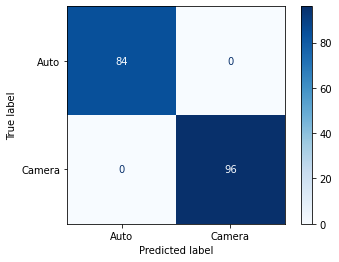

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(SVM, X_test, y_test, display_labels=["Auto", "Camera"],cmap=plt.cm.Blues) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Camera', 'Auto']
print(classification_report(y_test, resultado, target_names=target_names))

              precision    recall  f1-score   support

      Camera       1.00      1.00      1.00        84
        Auto       1.00      1.00      1.00        96

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [ ]:
y_pred = resultado

from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 0.0
MAPE: 0.0
MSE: 0.0
R^2: 1.0
